# Parkinson's Disease Detection

EEG signal-analysis techniques have been used to diagnose brain abnormalities.

The main aim of the data is to discriminate healthy people from those with PD, according to the "class" column which is set to 0 for healthy and 1 for PD.


In [1]:
import pandas as pd
import numpy as np

#scalling
from sklearn.preprocessing import StandardScaler

#splitting
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

#metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#handling implance
from imblearn.over_sampling import SMOTE


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
df = pd.read_csv('pd_EEG_features.csv')

In [3]:
#check data shape
df.shape

(756, 755)

In [4]:
#check data shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
df.describe()

,id,gender,PPE,EEG,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.head(10)

,id,gender,PPE,EEG,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


In [7]:
df['id'].value_counts()

id
0      3
173    3
160    3
161    3
162    3
      ..
88     3
89     3
90     3
91     3
251    3
Name: count, Length: 252, dtype: int64

- We notice that each id has 3 rows of data set
- we couldn't get more details if this repetition represent different samples or each sample taken in different conditions

In [8]:
#check data if there is nay columns has the same value counts of ID column it may represent condition
for column in df.columns:
    if df['id'].value_counts().equals(df[column].value_counts()):
        print(column)

id


- So, these may represent different sample
- We can keep it or get the mean of these samples

In [9]:
# To get the mean of samples uncomment the belwo code
# df = df.groupby('id').mean().reset_index()
df.drop('id', axis=1, inplace=True)

## Data cleaning

In [10]:
#check null
df.isnull().sum().nlargest(3)

gender    0
PPE       0
EEG       0
dtype: int64

In [11]:
#check duplicated
df[df.duplicated()]

,gender,PPE,EEG,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
113,0,0.79067,0.58465,0.6425,321,320,0.006004,0.000143,0.00207,0.000012,...,3.58,4.0251,2.9654,3.8369,4.2973,3.6458,3.1854,3.7708,10.0693,1


In [12]:
#drop duplicated
df = df.drop_duplicates(keep = 'first')

# EDA

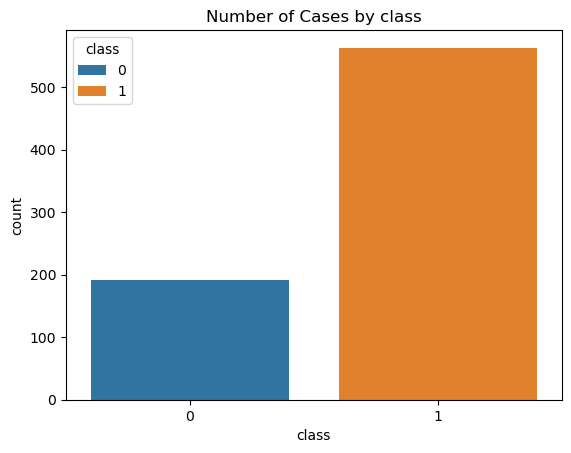

In [13]:
sns.countplot(data = df, x = 'class', hue = 'class')
plt.title('Number of Cases by class');

The data is imbalance as the healthy cases about 3 times of cases with PD. 

We will consider this problem during building the model, if mofdel trained on this dataset will have a harder time predicting positive classes which is our main objective here.

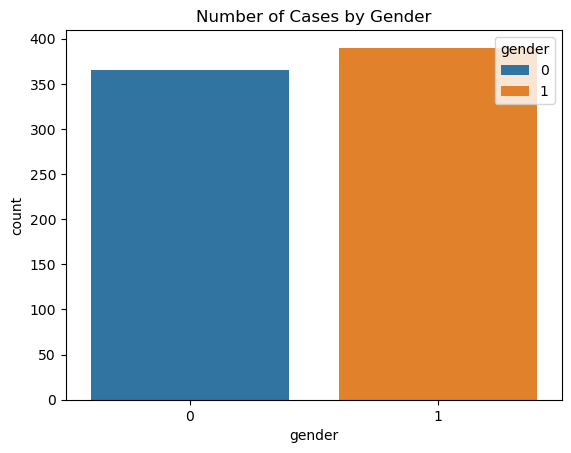

In [14]:
sns.countplot(data = df, x = 'gender', hue = 'gender')
plt.title('Number of Cases by Gender');

- Dataset has almost equal gender subgroups

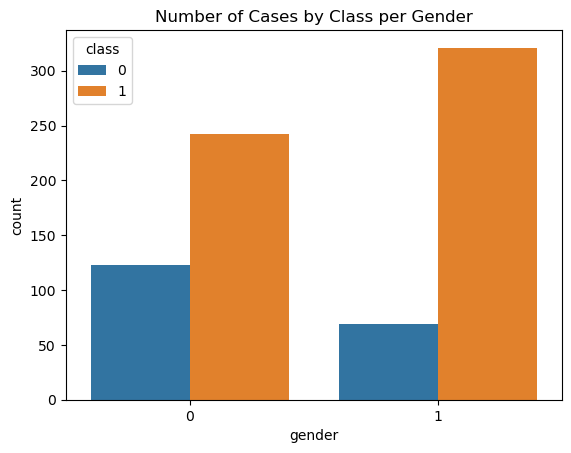

In [15]:
sns.countplot(data = df, x = 'gender', hue = 'class')
plt.title('Number of Cases by Class per Gender');

- For one gender the healthy cases are about douple the PD cases
- The other gender the healthy cases are about 4.5 times than PD cases

#  Features Selection

We have 753 feature in our dataset these many features only indicate that they have been derived from one another
We can remove the highly correlated features except for the target column.

In [16]:
df1= df.copy()
filtered_columns = []

In [17]:
columns = list(df1.columns)

for col in columns:

    if col == 'class':
        continue
 
    filtered_columns = [col]
    for col1 in df1.columns:
        if((col == col1) | (col == 'class')):
            continue
 
        val = df1[col].corr(df1[col1])
 
        if val > 0.7:
            # If the correlation between the two
            # features is more than 0.7 remove
            columns.remove(col1) # to reduce iterations as col1 has high coreelation and removed from columns list
            continue
        else:
            filtered_columns.append(col1)
 
    # After each iteration filter out the columns
    # which are not highly correlated features.
    df1 = df1[filtered_columns]


df1.shape

(755, 313)

we have reduced it to a feature space of 313 columns.
It can be reduced again using 

**if you applied commented code and get the mean of the 3 samples for each ID data shape will be (252,313)**

We still have too high number of features is still more than the number of examples or data points. Reason behind this statement is the same as that behind the curse of dimensionality problem as the feature space grows the number of examples required to generalize on the dataset becomes difficult and the model’s performance decreases.

## `3-A)` Feature Selection Using Lasso

In [18]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
X = df1.drop('class', axis=1)
y = df1['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha = 0.1)
#fit lasso regression for the X and y data
lasso.fit(X_scaled,y)


Lasso(alpha=0.1)

In [19]:
(lasso.coef_ > 0 ).sum()

4

In [20]:
(lasso.coef_ < 0 ).sum()

1

In [21]:
coef_df = pd.DataFrame({'feature': X.columns, 'coef':lasso.coef_})

In [22]:
coef_df[(coef_df['coef'] > 0) |  (coef_df['coef'] < 0)]

,feature,coef
3,tqwt_kurtosisValue_dec_26,-0.022398
57,tqwt_minValue_dec_11,0.024266
223,std_11th_delta_delta,0.006579
224,std_7th_delta,0.022509
273,mean_MFCC_2nd_coef,0.050613


In [23]:
coef_df[(coef_df['coef'] > 0) |  (coef_df['coef'] < 0)]['feature'].values

array(['tqwt_kurtosisValue_dec_26', 'tqwt_minValue_dec_11',
       'std_11th_delta_delta', 'std_7th_delta', 'mean_MFCC_2nd_coef'],
      dtype=object)

According to lasso we can select these features

## `3-B)` Feature Selection Using PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA()

In [25]:
pca.fit(X_scaled)

PCA()

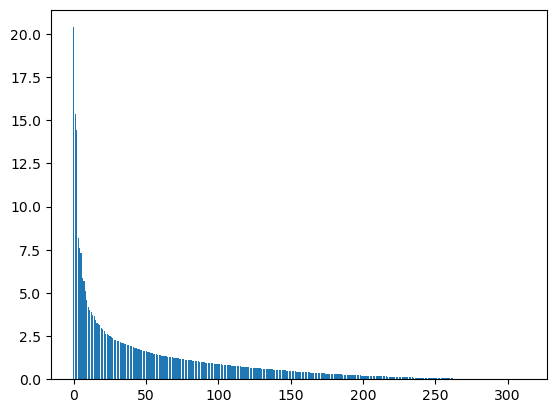

In [26]:
plt.bar(range(pca.n_components_), pca.explained_variance_);

According to this figure we select the intrinsic dimension (number of PCA with significat variance)
we may select 25 

# Creat a model

#### Steps of model creation

#### 1- Scaling Data
- Scaling the features to have a mean of 0 and a standard deviation of 1
- Having features with different scales and high variance, leading to numerical instability and poor model performance.

#### 2- Feature Selection
We have many features on our dataset and we will select only the most appropiate features to
- Reduce computing and enables the model to train faster.
- Reduces the complexity of a model and makes it easier to interpret.
- Reduces overfitting.

#### 3- Data Imbalance
- Dataset with an unequal ratio of data points in each class
- Model may appear to have high accuracy in these situations if it primarily predicts the majority class.
- We will use over sampling method

#### 4- Cross-Validation
- Helps to estimate the model's ability to generalize to unseen data. 
- When  dealing with small datasets, where a single train-test split may not provide a reliable estimate of the model's true performance.
- By dividing the dataset into multiple folds, training the model on a subset of the data (the training folds), and evaluating its performance on the remaining fold (the validation fold).
- The final performance estimate is the average of the K validation scores. 
- This approach ensures that the model is evaluated on different subsets of the data, reducing the risk of overfitting

#### 5- Metric
- We need the result of our model having the lowest False Positive (The case is PD (0) while the model predicted they are healthy (1).
- Precision : number of true positives divided by the sum of all positive predictions (TP + FP)


In [27]:
#spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

#scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#selecting features
pca_model = PCA(n_components= 25)
X_train_scaled_pca = pca_model.fit_transform(X_train_scaled)
X_test_scaled_pca = pca_model.transform(X_test_scaled)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=7)
X_train_scaled_pca_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_pca, y_train)

In [28]:
#check data shape before resample
X_train_scaled_pca.shape, X_test_scaled_pca.shape, y_train.shape, y_test.shape

((604, 25), (151, 25), (604,), (151,))

In [29]:
#check data shpae after reample
X_train_scaled_pca_resampled.shape, y_train_resampled.shape

((906, 25), (906,))

### Modeling without Cross Folding

In [30]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(len(models)):
    
    models[i].fit(X_train_scaled_pca_resampled, y_train_resampled)
    y_pred = models[i].predict(X_test_scaled_pca)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', roc_auc_score(y_train_resampled, models[i].predict_proba(X_train_scaled_pca_resampled)[:,1]))
    print('Validation Accuracy : ', roc_auc_score(y_test, models[i].predict_proba(X_test_scaled_pca)[:,1]))
    print("Accuracy:", accuracy_score(y_test, y_pred)) 
    print("Precision:", precision_score(y_test, y_pred)) 
    print("Recall:", recall_score(y_test, y_pred)) 
    print("F1 score:", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print()


LogisticRegression() : 
Training Accuracy :  0.8866862564507404
Validation Accuracy :  0.7682926829268292
Accuracy: 0.7417218543046358
Precision: 0.8514851485148515
Recall: 0.7818181818181819
F1 score: 0.8151658767772512
[[26 15]
 [24 86]]

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9622287521502468
Validation Accuracy :  0.8425720620842573
Accuracy: 0.8609271523178808
Precision: 0.856
Recall: 0.9727272727272728
F1 score: 0.9106382978723404
[[ 23  18]
 [  3 107]]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_ste

In our case **Precision** is a more important evaluation metric.

XGB Model is the best between these three models with recall 85.8 %

### Modeling with Cross Folding

In [31]:
from sklearn.model_selection import cross_val_score , KFold
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Perform K-Fold cross-validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=7)

for model in models:
    
    cv_Precision = cross_val_score(model, X_train_scaled_pca_resampled, y_train_resampled, cv=kf, scoring='precision')
    print("Mean cross-validation", str(model).split('(')[0], "precision:", round(np.mean(cv_Precision), 4))


Mean cross-validation LogisticRegression precision: 0.7836
Mean cross-validation SVC precision: 0.7449
Mean cross-validation XGBClassifier precision: 0.9128


With cross folding the precision value of SVC model decreased to 74.06 % and XGBClassifier model having highest precision 92.91 %